# Refine MSCommFitting for the standardized experimental framework 

In [37]:
%run mscommfitting.py

graphs

mscommfit = MSCommFitting()
mscommfit.load_data(phenotypes_csv_path = 'PhenotypeStoichiometry.csv',  # !!! determine the fluxes of each species within the code
                    signal_csv_paths = {'path':'PF-EC 4-29-22 ratios and 4HB changes (1).xlsx', 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
                    media_conc_path = 'media_conc.csv',   # !!! replace with a KBase base_media formulation
                    species_abundance_path = 'species_abundances.csv',   
                    carbon_conc_series = {'rows': {   # !!! use MSMedia to add these compounds to the base_media
                        'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                        'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                        }},
                    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,5,6,7,8,9,10,11,12]}, # 'wells': ['C2', 'G3', 'C12']}   # !!! implement a conversion from this format to a list of standardized IDs
                   # ignore_timesteps = [x for x in range(20,167)],
                    extract_zip_path='../mscomfit.zip'
                   )
print(datetime.today())
mscommfit.define_problem(parameters={
                                    'v':0.3,
                                    'cvmin': 100,
                                    'bcv': 100,
                                    'diffpos': 100,
                                    'diffneg': 100
                                    }, 
                         export_zip_name='standardized.zip',
                         final_relative_carbon_conc = 0.1, 
                         metabolites_to_track = ["cpd00179","cpd00029","cpd00136"], 
                         bad_data_timesteps = {'*':'23:'})
print(datetime.today())
%time mscommfit.compute(graphs, export_zip_name='standardized.zip', publishing=True)
print(datetime.today())
print('growth Vmax:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')

The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.


FileNotFoundError: [Errno 2] No such file or directory: 'PF-EC 4-29-22 ratios and 4HB changes (1).xlsx'

# parse content

In [35]:
from pandas import read_csv

def redefine_index(df):
    df.index = df["short_codes"]
    del df["short_codes"]

experiments = read_csv("29-04-22/experimental_metadata.csv")
pflourescens = read_csv("29-04-22/mNeonGreen.csv")
redefine_index(pflourescens)
ecoli = read_csv("29-04-22/mRuby.csv")
redefine_index(ecoli)
community_OD = read_csv("29-04-22/Raw_OD(590).csv")
redefine_index(community_OD)

,Time (s),values,experiment_IDs
short_codes,,,
Y3,0.420,23932.0,r1_ecoli_mRuby-r20_pf-5_malt
Y3,597.062,23739.0,r1_ecoli_mRuby-r20_pf-5_malt
Y3,1188.937,23757.0,r1_ecoli_mRuby-r20_pf-5_malt
Y3,1781.411,23516.0,r1_ecoli_mRuby-r20_pf-5_malt
Y3,2373.911,23090.0,r1_ecoli_mRuby-r20_pf-5_malt
...,...,...,...
Y3,95392.411,77108.0,r1_ecoli_mRuby-r20_pf-5_malt
Y3,95985.473,77162.0,r1_ecoli_mRuby-r20_pf-5_malt
Y3,96577.303,76780.0,r1_ecoli_mRuby-r20_pf-5_malt


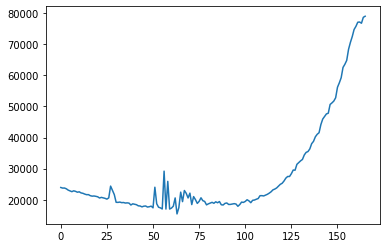

In [45]:
# community_OD.head()
# print(ecoli.index[-2:])
from scipy.constants import hour
from numpy import diff, mean, rint, std
from matplotlib import pyplot

for trial in set(pflourescens.index):
    minor = pflourescens[pflourescens.index == trial]
    timesteps = minor["Time (s)"].to_list()
    simulation_time = timesteps[-1]/hour
    timestep_hr = mean(diff(timesteps))
    fig, ax = pyplot.subplots()
    ax.plot(rint(minor["Time (s)"].to_numpy()/timestep_hr), minor["values"].to_numpy(), label=minor.index[0])
    display(minor)
    break